<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [236]:
#Import Library
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For advanced visualization

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Example ML model
from sklearn.metrics import mean_squared_error  # For evaluating models


1. display 5 columns from dataset

In [237]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Stanley2204/TugasDataMining/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [238]:
#2

#conclusion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [239]:
#3a
# Display the number of each unique value in the 'admission' column (including NaN)
admission_counts = df['admission'].value_counts(dropna=False)
print("\nAdmission column value counts (including NaN):")
print(admission_counts)


Admission column value counts (including NaN):
admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [240]:
#3b
# Display the number of each unique value in the 'race' column (including NaN)
race_counts = df['race'].value_counts(dropna=False)
print("Race column value counts (including NaN):")
print(race_counts)

Race column value counts (including NaN):
race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [241]:
#4
# Fill NaN values in 'admission' with 'deny'
df['admission'].fillna('deny', inplace=True)

# Fill NaN values in 'race' with 'other'
df['race'].fillna('other', inplace=True)

# Verify the changes
print("Updated 'admission' column value counts:")
print(df['admission'].value_counts())

print("\nUpdated 'race' column value counts:")
print(df['race'].value_counts())

Updated 'admission' column value counts:
admission
deny        5194
Admit        900
Waitlist     100
Name: count, dtype: int64

Updated 'race' column value counts:
race
other       1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


<ipython-input-241-5c8414d6ac28>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-241-5c8414d6ac28>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [242]:
#5
missing_values = df.isnull().sum()

missing_values


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [243]:
# 6
# Fill NaN values in 'admission' with 'deny'
df['admission'].fillna('deny', inplace=True)

# Fill NaN values in 'race' with 'other'
df['race'].fillna('other', inplace=True)

# Drop the 'application_id' column
df.drop('application_id', axis=1, inplace=True)

# Verify the column has been dropped
print("Columns after dropping 'application_id':")
print(df.columns)

Columns after dropping 'application_id':
Index(['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp',
       'work_industry', 'admission'],
      dtype='object')


7. show describe column and conclude what the insight is from that column

In [244]:
#7

#conclusion

# Show descriptive statistics for numerical columns
describe_df = df.describe()
describe_df.head()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

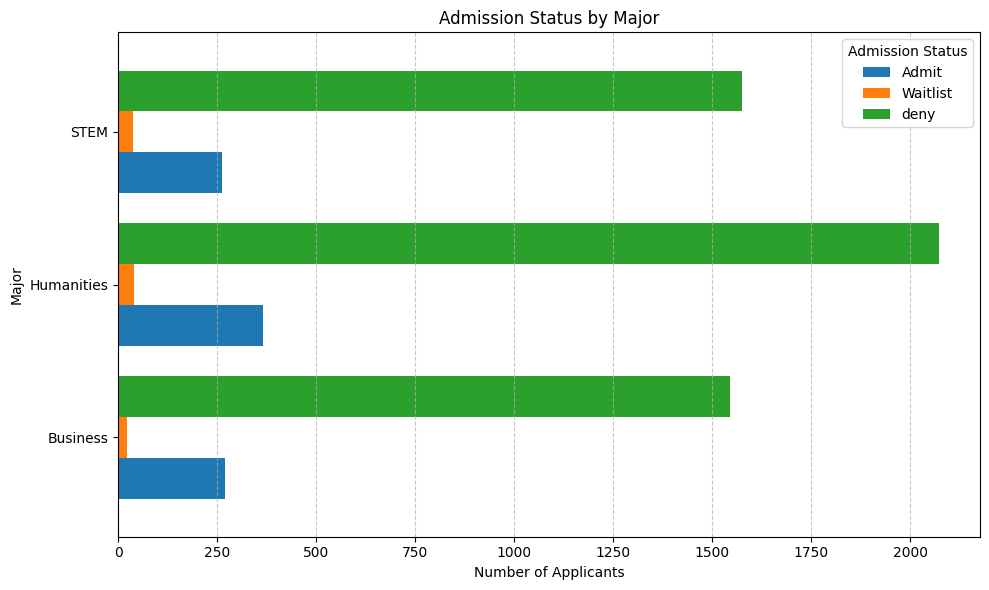

In [245]:
#8
# Group data by 'major' and 'admission' to count occurrences
admission_major_counts = df.groupby(['major', 'admission']).size().unstack()

# Create a grouped horizontal bar chart
admission_major_counts.plot(
    kind='barh',
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue for 'Admit', Orange for 'Deny', Green for 'Waitlist'
    width=0.8
)

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='best')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

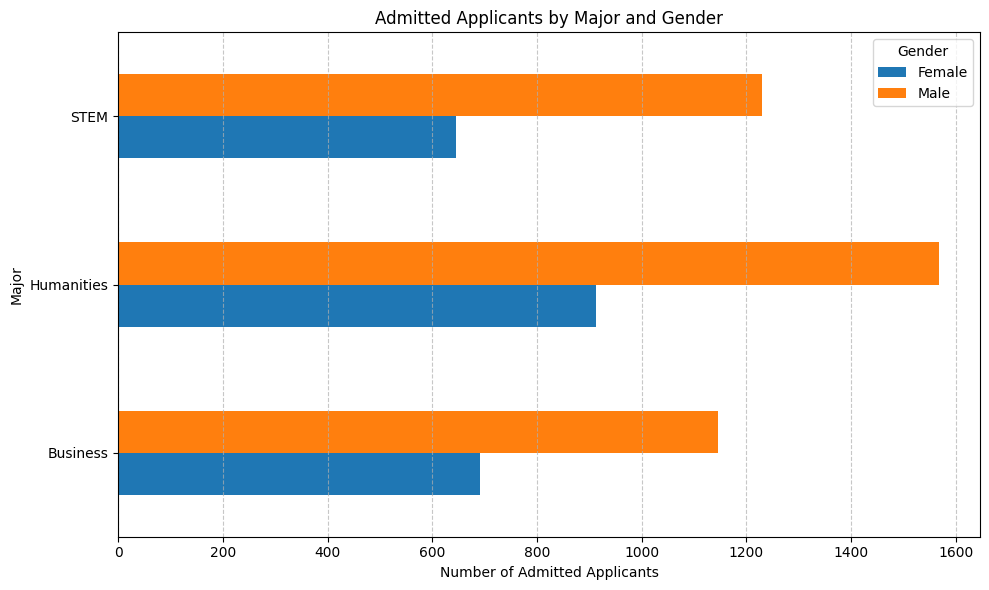

In [246]:
#9
# Group data by major and gender, then count the occurrences
admission_gender_counts = df.groupby(['major', 'gender']).size().unstack()


# Create a horizontal bar chart
admission_gender_counts.plot(
    kind='barh',
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']  # Blue for 'Female', Orange for 'Male'
)

# Customize the chart
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender', loc='best')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-247-aed6ba8db4ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gmat', y='major', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

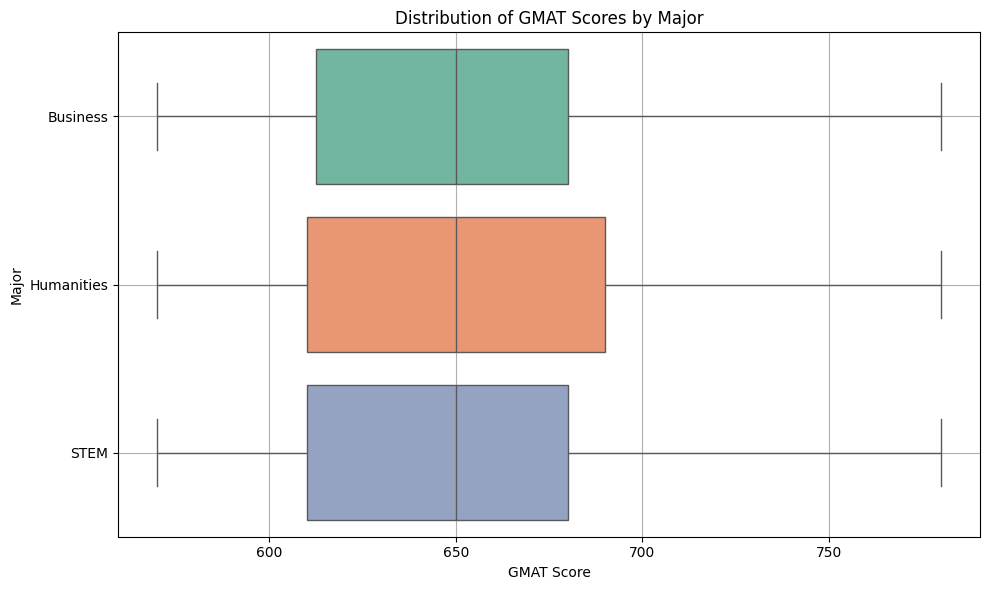

In [247]:
#10
# Create a boxplot showing GMAT score distribution by major
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gmat', y='major', palette='Set2')

# Customize the chart
plt.title('Distribution of GMAT Scores by Major')
plt.xlabel('GMAT Score')
plt.ylabel('Major')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()

# This boxplot will allow us to see the spread of GMAT scores for each major.
#It highlights how some majors might have a wider range of GMAT scores, while others show a tighter distribution,
#indicating stricter or more consistent admissions standards. Additionally,
#this helps identify outliers—students with exceptionally high or low GMAT scores compared to their peers.

11. create your own insightful visualization and explain it in at least 2 sentences

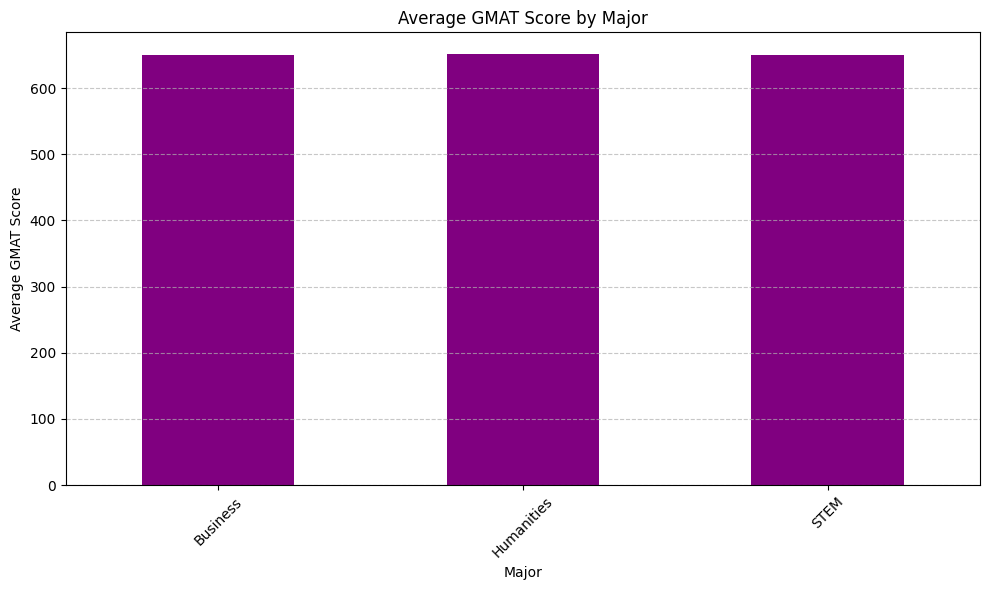

In [248]:
# Group data by major and calculate the average GMAT score
avg_gmat_by_major = df.groupby('major')['gmat'].mean()

# Create a bar plot for average GMAT scores by major
plt.figure(figsize=(10, 6))
avg_gmat_by_major.plot(kind='bar', color='purple')

# Customize the chart
plt.title('Average GMAT Score by Major')
plt.xlabel('Major')
plt.ylabel('Average GMAT Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

12. encode categorical columns and display the results

In [257]:
df['admission'].fillna('Deny', inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()

# Columns to be encoded
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Apply LabelEncoder to each column
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

# Display the resulting dataframe with encoded columns
df_encoded = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]
df_encoded.head()

<ipython-input-257-e4c652990c2b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,1.0
1,1,0,3.28,1,1,680.0,5.0,6,0.0
2,0,1,3.30,0,5,710.0,5.0,13,1.0
3,1,0,3.47,2,1,690.0,6.0,13,0.0
4,1,0,3.35,2,2,590.0,5.0,1,0.0


In [250]:
# Encode categorical columns
label_encoder = LabelEncoder()

# Columns to be encoded
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Map the admission column to integers (Admit = 1, Deny = 0)
df['admission'] = df['admission'].map({'Admit': 1, 'deny': 0})

# Select only the desired columns
df_encoded = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]

# Display the resulting dataframe with encoded columns
df_encoded.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,1.0
1,1,0,3.28,1,1,680.0,5.0,6,0.0
2,0,1,3.30,0,5,710.0,5.0,13,1.0
3,1,0,3.47,2,1,690.0,6.0,13,0.0
4,1,0,3.35,2,2,590.0,5.0,1,0.0


13. create a heatmap to see the correlation and explain the conclusion

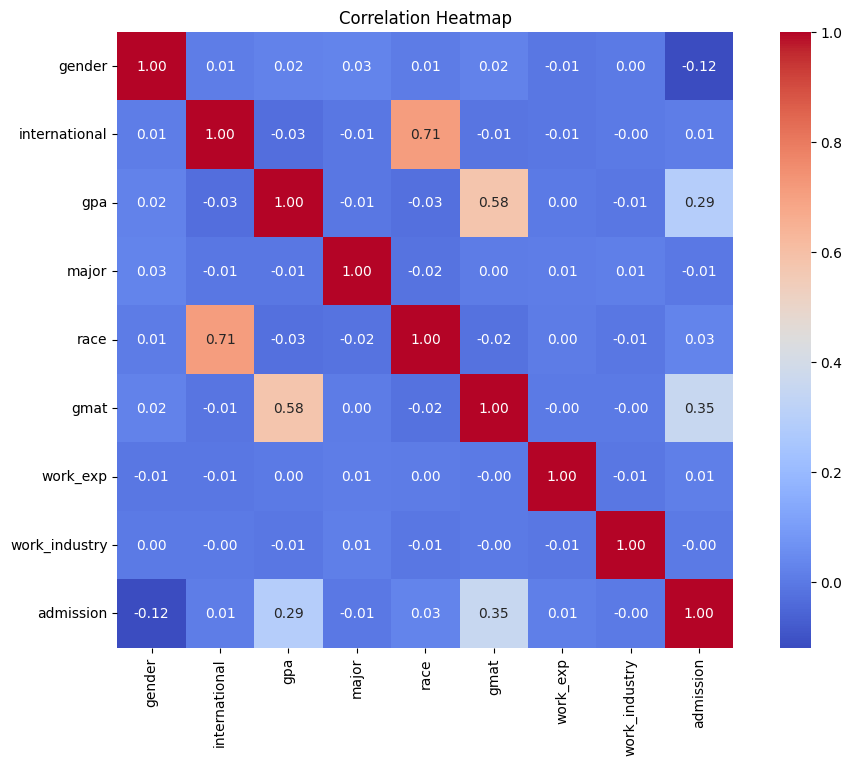

In [251]:
#13


# Menghitung matriks korelasi
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure dengan ukuran yang diperbaiki
plt.figure(figsize=(12, 8))  # Ukuran lebar 12 dan tinggi 8

# Membuat heatmap dengan anotasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Tambahkan judul
plt.title('Correlation Heatmap')
plt.show()

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [252]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalkan dfnew sudah ada dan siap digunakan
# Pisahkan fitur dan variabel target
X = df.drop('admission', axis=1)  # Fitur
y = df['admission']                # Target

# Bagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print('Matriks Kebingungan:')
print(confusion)
print('Laporan Klasifikasi:')
print(classification_rep)


ValueError: Input y contains NaN.

In [254]:
# Hitung rata-rata GPA dari data yang ada
average_gpa = df['gpa'].mean()
print(f'Rata-rata GPA: {average_gpa:.2f}')

# Buat data Lisa sebagai dictionary
lisa_data = {
    'gender': 'Female',           # Contoh gender
    'international': True,       # Contoh status internasional
    'gpa': average_gpa,          # Gunakan rata-rata GPA yang sudah dihitung
    'major': 'Business',          # Contoh jurusan
    'race': 'Asian',              # Contoh ras
    'gmat': 700,                  # Contoh nilai GMAT
    'work_exp': 5,                # Contoh pengalaman kerja
    'work_industry': 'Consulting'  # Contoh industri kerja
}

# Buat DataFrame dengan data Lisa
lisa_df = pd.DataFrame([lisa_data])

# Encode fitur kategorikal untuk data Lisa
lisa_df['gender'] = lisa_df['gender'].map({'Female': 0, 'Male': 1})
lisa_df['international'] = lisa_df['international'].map({False: 0, True: 1})
lisa_df['major'] = lisa_df['major'].map({'Business': 0, 'Humanities': 1, 'STEM': 2})  # Sesuaikan dengan kode
lisa_df['race'] = lisa_df['race'].map({'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Other': 3})  # Sesuaikan dengan kode
lisa_df['work_industry'] = lisa_df['work_industry'].map({'Consulting': 0, 'Financial Services': 1, 'Investment Management': 2, 'Technology': 3})  # Sesuaikan dengan kode

# Lakukan prediksi menggunakan model yang telah dilatih
lisa_prediction = model.predict(lisa_df)

# Decode prediksi kembali ke label asli
lisa_prediction_label = 'Admit' if lisa_prediction[0] == 0 else 'Deny'
print(f'Status Penerimaan Lisa: {lisa_prediction_label}')

Rata-rata GPA: 3.25


AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'